In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("D:\\NIBM\\Machine Learning\\Data Sets\\customer_details.csv")

In [3]:
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
print(data.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [6]:
data = data.drop(columns=['Customer ID'])

In [7]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data['Season'] = data['Season'].replace({'Spring': 1, 'Summer': 2, 'Winter': 3, 'Fall': 4})
data['Subscription Status'] = data['Subscription Status'].replace({'Yes': 1, 'No': 0})
data['Discount Applied'] = data['Discount Applied'].replace({'Yes': 1, 'No': 0})
data['Frequency of Purchases'] = data['Frequency of Purchases'].replace({'Every 3 Months': 1, 'Annually' : 2, 'Quarterly' : 3, 'Monthly' : 4, 'Bi-Weekly' : 5,'Fortnightly' : 6 ,'Weekly' : 7})
data['Previous Purchases'] = data['Previous Purchases'].replace({'Yes': 1, 'No': 0})

In [8]:
data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,Blouse,Clothing,53,Kentucky,L,Gray,3,3.1,1,Express,1,Yes,14,Venmo,6
1,19,1,Sweater,Clothing,64,Maine,L,Maroon,3,3.1,1,Express,1,Yes,2,Cash,6
2,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,1,3.1,1,Free Shipping,1,Yes,23,Credit Card,7
3,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,1,3.5,1,Next Day Air,1,Yes,49,PayPal,7
4,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,1,2.7,1,Free Shipping,1,Yes,31,PayPal,2


In [9]:
X = data.drop('Subscription Status', axis=1)
y = data['Subscription Status']

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

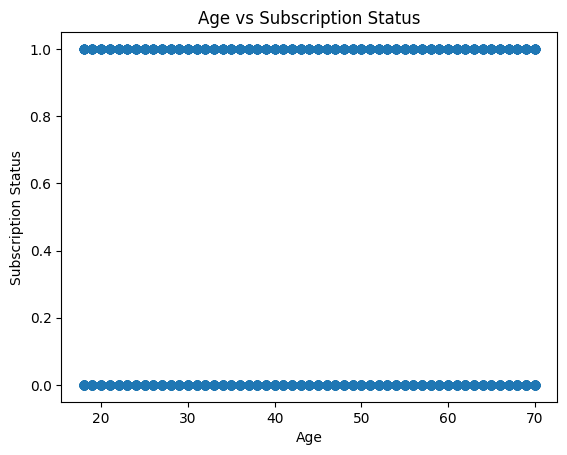

In [11]:
plt.scatter(data['Age'], data['Subscription Status'])
plt.xlabel('Age')
plt.ylabel('Subscription Status')
plt.title('Age vs Subscription Status')
plt.show()

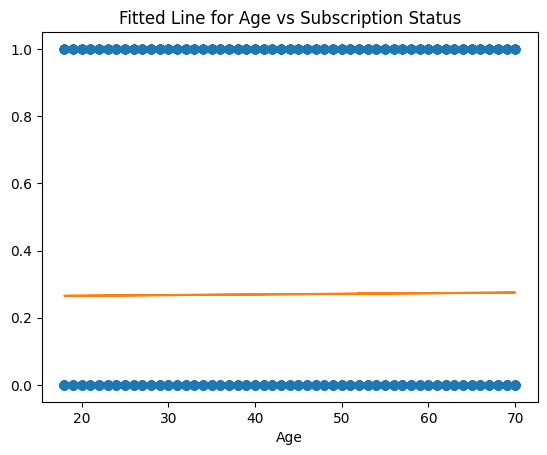

In [12]:
m, c = np.polyfit(data['Age'], data['Subscription Status'], 1)
plt.xlabel('Age')
plt.plot(data['Age'], data['Subscription Status'], 'o')
plt.plot(data['Age'], m * data['Age'] + c)
plt.title('Fitted Line for Age vs Subscription Status')
plt.show()

In [13]:
print(data.head())

   Age  Gender Item Purchased  Category  Purchase Amount (USD)       Location  \
0   55       1         Blouse  Clothing                     53       Kentucky   
1   19       1        Sweater  Clothing                     64          Maine   
2   50       1          Jeans  Clothing                     73  Massachusetts   
3   21       1        Sandals  Footwear                     90   Rhode Island   
4   45       1         Blouse  Clothing                     49         Oregon   

  Size      Color  Season  Review Rating  Subscription Status  Shipping Type  \
0    L       Gray       3            3.1                    1        Express   
1    L     Maroon       3            3.1                    1        Express   
2    S     Maroon       1            3.1                    1  Free Shipping   
3    M     Maroon       1            3.5                    1   Next Day Air   
4    M  Turquoise       1            2.7                    1  Free Shipping   

   Discount Applied Promo Code U

In [14]:
print(data.tail())

      Age  Gender Item Purchased     Category  Purchase Amount (USD)  \
3895   40       0         Hoodie     Clothing                     28   
3896   52       0       Backpack  Accessories                     49   
3897   46       0           Belt  Accessories                     33   
3898   44       0          Shoes     Footwear                     77   
3899   52       0        Handbag  Accessories                     81   

        Location Size      Color  Season  Review Rating  Subscription Status  \
3895    Virginia    L  Turquoise       2            4.2                    0   
3896        Iowa    L      White       1            4.5                    0   
3897  New Jersey    L      Green       1            2.9                    0   
3898   Minnesota    S      Brown       2            3.8                    0   
3899  California    M      Beige       1            3.1                    0   

       Shipping Type  Discount Applied Promo Code Used  Previous Purchases  \
3895  2-

In [15]:
print(data.isnull().sum())

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


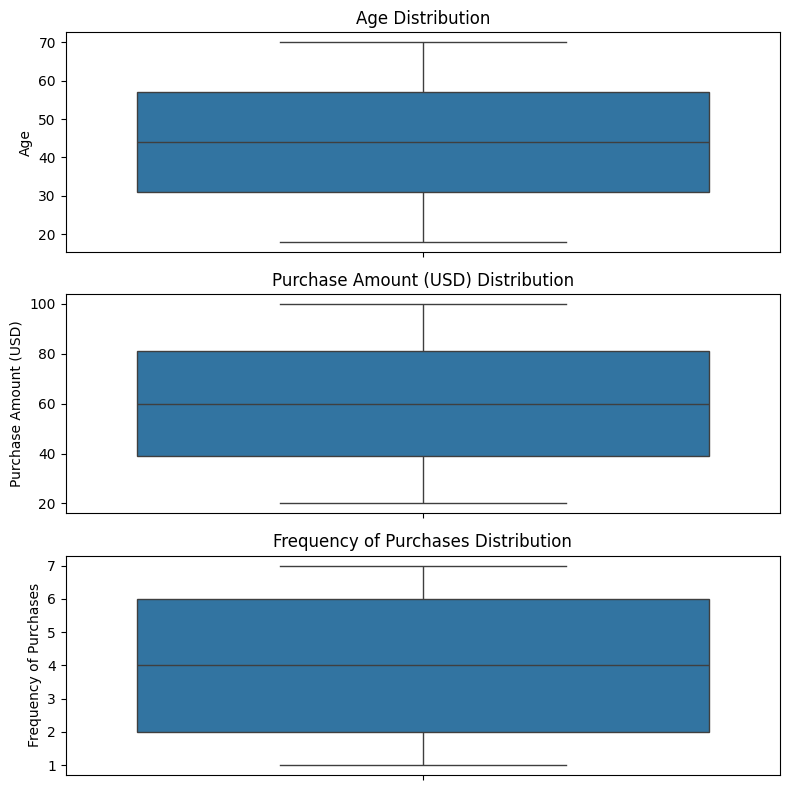

In [16]:
fig, axs = plt.subplots(3, figsize=(8, 8))

sns.boxplot(y=data['Age'], ax=axs[0])
axs[0].set_title('Age Distribution')

sns.boxplot(y=data['Purchase Amount (USD)'], ax=axs[1])
axs[1].set_title('Purchase Amount (USD) Distribution')

sns.boxplot(y=data['Frequency of Purchases'], ax=axs[2])
axs[2].set_title('Frequency of Purchases Distribution')

plt.tight_layout()
plt.show()


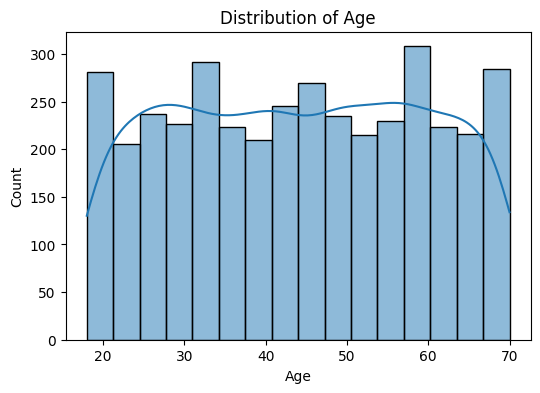

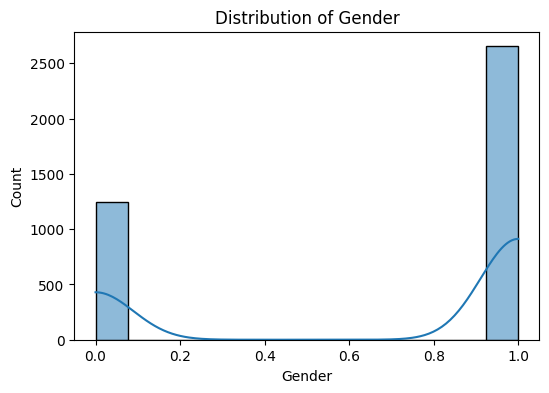

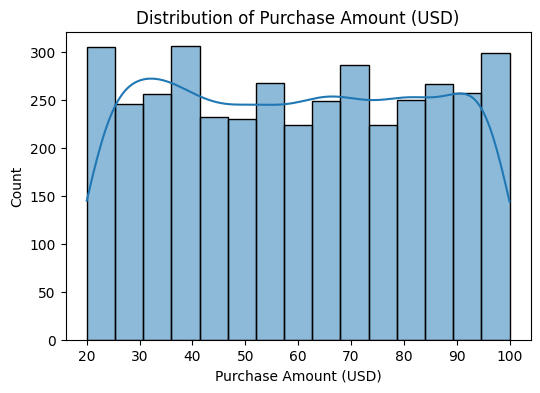

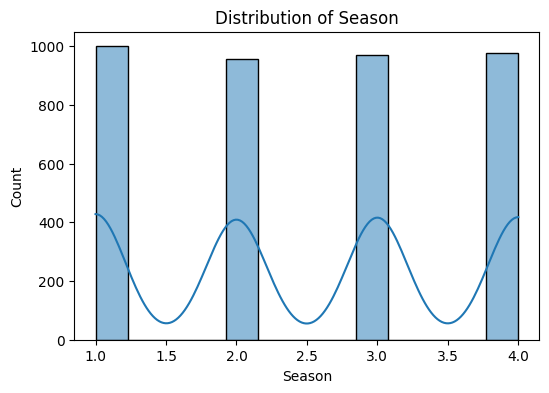

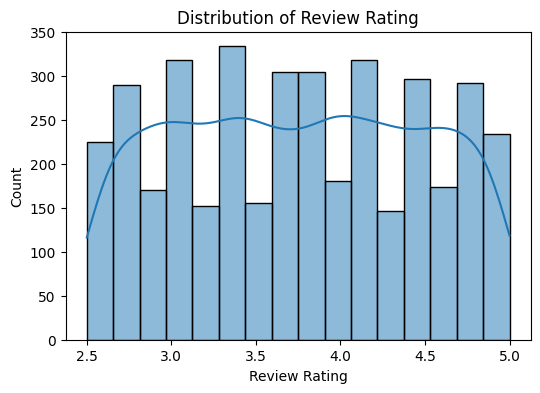

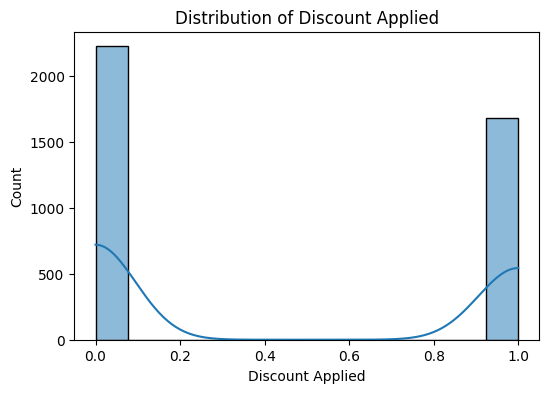

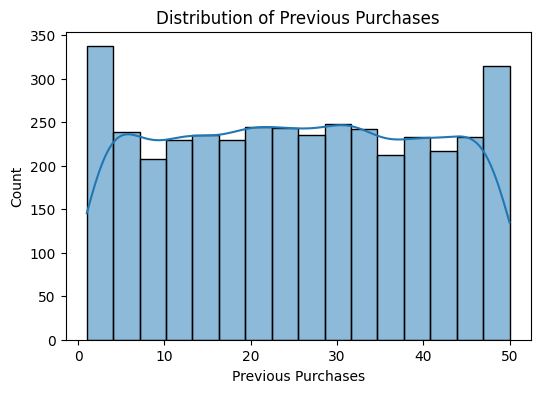

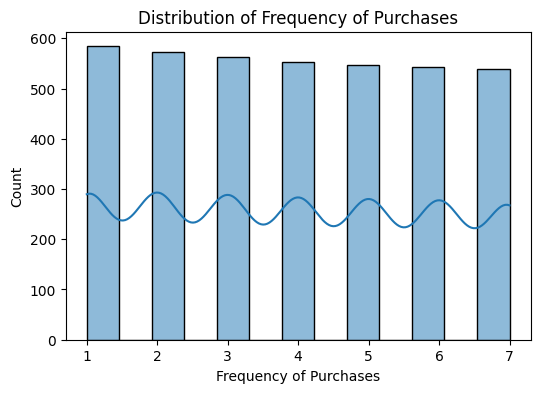

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

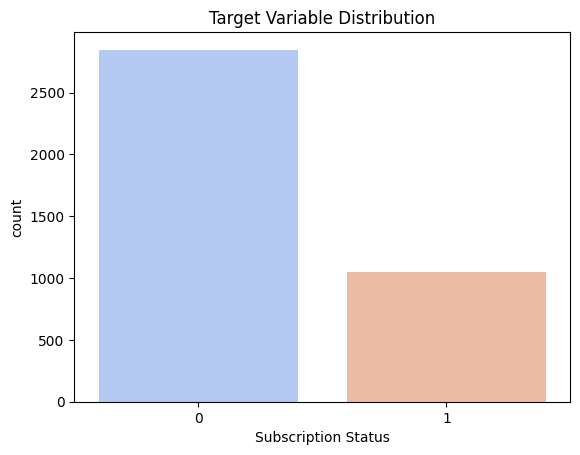

In [18]:
sns.countplot(x='Subscription Status', data=data, palette='coolwarm')
plt.title('Target Variable Distribution')
plt.show()

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [20]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [22]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Gender',
                                                   'Purchase Amount (USD)',
                                                   'Season', 'Review Rating',
                                                   'Discount Applied',
                                                   'Previous Purchases',
                                                   'Frequency of Purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Item Purchased', 'Category',
                                                   'Location', 'Size', 'Color',
                                                   'Shipping Type',
                                                   'Promo Code Used',
                                                   'Payment Method'])])),
                ('classifier', LogisticRegression())])

In [23]:
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)[:, 1]

In [24]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

In [25]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.808974358974359
Confusion Matrix:
[[462 102]
 [ 47 169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       564
           1       0.62      0.78      0.69       216

    accuracy                           0.81       780
   macro avg       0.77      0.80      0.78       780
weighted avg       0.83      0.81      0.81       780

ROC AUC Score: 0.8746141975308643


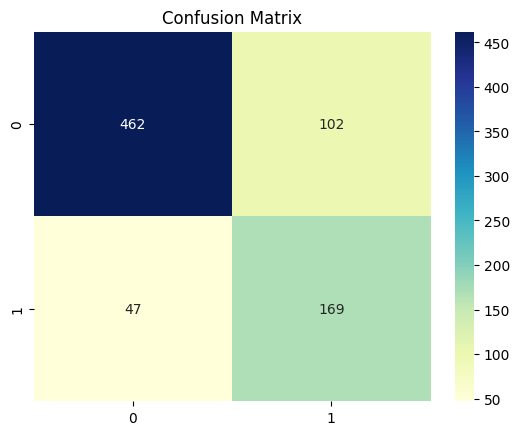

In [26]:
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Confusion Matrix')
plt.show()

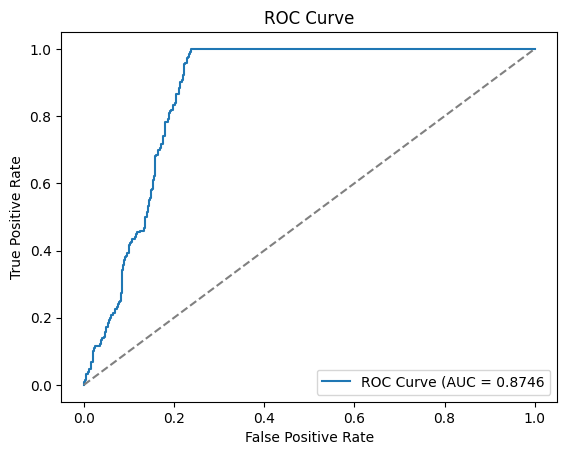

In [27]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [28]:
pd.DataFrame(data=[y_test, y_pred], index=['y_test', 'y_pred'])

,1726,3339,779,366,1048,2262,2338,2439,1453,3402,...,2775,770,3055,2016,3494,232,3230,2482,2154,483
y_test,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
y_pred,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0


In [29]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test})

,Actual,Predicted
1726,0,0
3339,0,0
779,1,1
366,1,1
1048,1,1
...,...,...
232,1,1
3230,0,0
2482,0,0
2154,0,0
